# EXERCISE

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# loading into python
data2 = pd.read_csv('C:/Users/Lenovo/NORKA/03rd jan 2023/DATA/titanic_dataset.csv')

In [6]:
# display first 5 rows of the dataframe
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# display information about the dataframe
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


~ Name, Sex, Ticket, Cabin and Embarked are of type object

## MISSING VALUES

In [8]:
# number of null values in the dataframe 'data'
data2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# to find the percentage of missing values
data2.isnull().sum()*100/len(data2) 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

~ The columns 'Age', 'Cabin' and 'Embarked' are having 177, 687 and 2 null values

~ For 'Cabin' column from the dataframe , 77.104377 % of the data are null values, dropping that column from the dataframe will be the best option. If  the null values of  'Cabin' column are filled with mode, there is a chance for biasing  in our data set.

In [10]:
# dropping 'Cabin' column from the dataframe 'data2'
data2.drop('Cabin', axis=1, inplace = True)


In [11]:
# displaying the mode of 'Embarked' column 
data2['Embarked'].mode()[0]

'S'

In [12]:
# filling missing values in 'Embarked' column with mode since it is a categorical column
data2['Embarked'] = data2['Embarked'].fillna(data2['Embarked'].mode()[0])

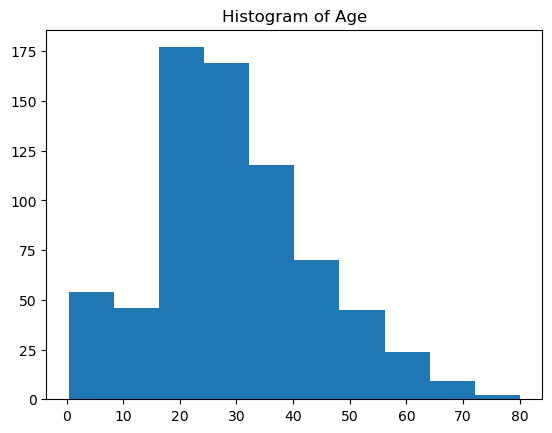

In [13]:
# plotting histogram of 'Age' column
plt.hist(data2['Age'])
plt.title("Histogram of Age")
plt.show()

~ right skewed - so use median to fill the missing values

In [14]:
# filling missing values in 'Age' column with median 
data2['Age'] = data2['Age'].fillna(data2['Age'].median())

In [15]:
# count of null values
data2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# Print information about the dataframe 'data2'
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## OUTLIER

~checking outliers for 'Age', 'Fare', 'SibSp' columns

##### 'Outliers' in 'Age' column

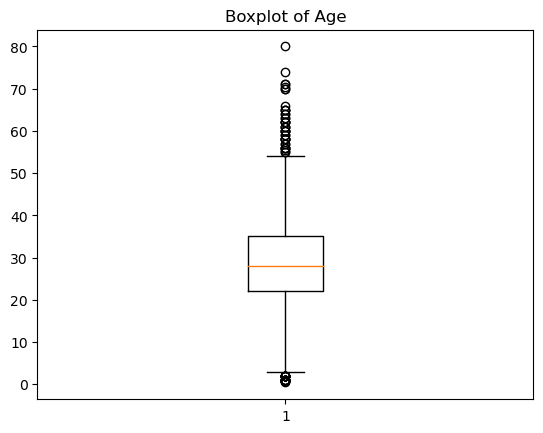

In [17]:
# Boxplot of 'Age' column to check outliers
plt.boxplot(data2['Age'])

# plotting the title as "Boxplot of Age"
plt.title("Boxplot of Age")

# display figures
plt.show()

~ lot of outliers  present above the upper whisker of 'Age' column 

First, Second and Third Quartile of 'Age' column

In [18]:
# First Quartile of 'Age' column
Q1_age = np.percentile(data2['Age'], 25, interpolation='midpoint')
f"First Quartile of 'Age' column = {Q1_age}"

"First Quartile of 'Age' column = 22.0"

In [19]:
# Second Quartile of 'Age' column
Q2_age = np.percentile(data2['Age'], 50, interpolation='midpoint')
f"Second Quartile of 'Age' column = {Q2_age}"

"Second Quartile of 'Age' column = 28.0"

In [20]:
# Third Quartile of 'Age' column
Q3_age = np.percentile(data2['Age'], 75, interpolation='midpoint')
f"Third Quartile of 'Age' column = {Q3_age}"

"Third Quartile of 'Age' column = 35.0"

In [21]:
# (interquartile range) IQR of  'Age' column
IQR_age = Q3_age-Q1_age
f"IQR of 'Age' column = {IQR_age}"

"IQR of 'Age' column = 13.0"

find the lower whisker and upper whisker of 'Age' column

In [22]:
# lower whisker of 'Age' column
low_age = Q1_age-1.5*IQR_age 
f"lower whisker of 'Age' column = {low_age}"

"lower whisker of 'Age' column = 2.5"

In [23]:
# upper whisker of 'Age' column
up_age = Q3_age+1.5*IQR_age
f"upper whisker of 'Age' column = {up_age}"

"upper whisker of 'Age' column = 54.5"

In [24]:
# to find the outliers  in 'Age' column and display it
outlier_age = [] 
for x_age in data2['Age']:
    if((x_age>up_age) or (x_age<low_age)):
        outlier_age.append(x_age)
f"Outliers of 'Age' column = {outlier_age}"


"Outliers of 'Age' column = [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]"

##### 'Outliers' in 'Fare' column

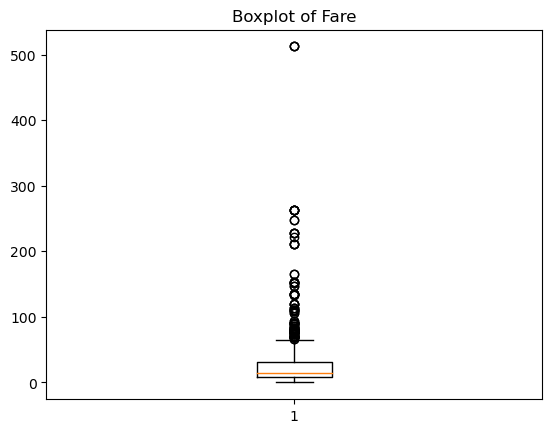

In [25]:
# Boxplot of 'Fare' column to check outliers
plt.boxplot(data2['Fare'])

# plotting the title as "Boxplot of Fare"
plt.title("Boxplot of Fare")

# display figures
plt.show()

~ lot of outliers  present above the upper whisker of 'Fare' column 

First, Second and Third Quartile of 'Fare' column

In [26]:
# First Quartile of 'Fare' column
Q1_fare = np.percentile(data2['Fare'], 25, interpolation='midpoint')
f"First Quartile of 'Fare' column = {Q1_fare}"

"First Quartile of 'Fare' column = 7.9104"

In [27]:
# Second Quartile of 'Fare' column
Q2_fare = np.percentile(data2['Fare'], 50, interpolation='midpoint')
f"Second Quartile of 'Fare' column = {Q2_fare}"

"Second Quartile of 'Fare' column = 14.4542"

In [28]:
# Third Quartile of 'Fare' column
Q3_fare = np.percentile(data2['Fare'], 75, interpolation='midpoint')
f"Third Quartile of 'Fare' column = {Q3_fare}"

"Third Quartile of 'Fare' column = 31.0"

In [29]:
# (interquartile range) IQR of  'Fare' column
IQR_fare = Q3_fare-Q1_fare
f"IQR of 'Fare' column = {IQR_fare}"

"IQR of 'Fare' column = 23.0896"

find the lower whisker and upper whisker of 'Fare' column

In [30]:
# lower whisker of 'Fare' column
low_fare = Q1_fare-1.5*IQR_fare 
f"lower whisker of 'Fare' column = {low_fare}"

"lower whisker of 'Fare' column = -26.724"

In [31]:
# upper whisker of 'Fare' column
up_fare = Q3_fare+1.5*IQR_fare
f"upper whisker of 'Fare' column = {up_fare}"

"upper whisker of 'Fare' column = 65.6344"

In [32]:
# to find the outliers  in 'Fare' column and display it
outlier_fare = [] 
for x_fare in data2['Fare']:
    if((x_fare>up_fare) or (x_fare<low_fare)):
        outlier_fare.append(x_fare)
f"Outliers of 'Fare' column = {outlier_fare}"


"Outliers of 'Fare' column = [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]"

##### 'Outliers' in 'SibSp' column

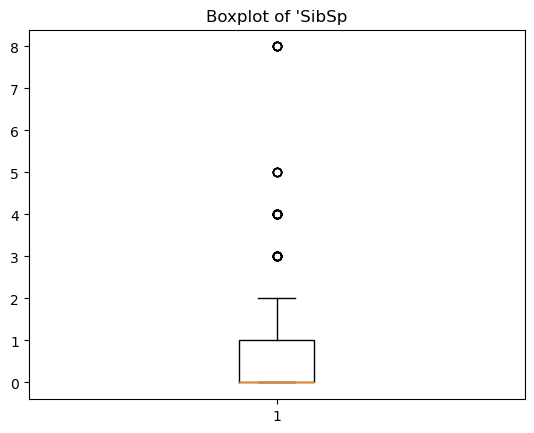

In [33]:
# Boxplot of 'SibSp' column to check outliers
plt.boxplot(data2['SibSp'])

# plotting the title as "Boxplot of 'SibSp"
plt.title("Boxplot of 'SibSp")

# display figures
plt.show()

~ some outliers present above the upper whisker of 'SibSp' column

In [34]:
# First Quartile of 'SibSp' column
Q1_sib = np.percentile(data2['SibSp'], 25, interpolation='midpoint')
f"First Quartile of 'SibSp' column = {Q1_sib}"

"First Quartile of 'SibSp' column = 0.0"

In [35]:
# Second Quartile of 'SibSp' column
Q2_sib = np.percentile(data2['SibSp'], 50, interpolation='midpoint')
f"Second Quartile of 'SibSp' column = {Q2_sib}"

"Second Quartile of 'SibSp' column = 0.0"

In [36]:
# Third Quartile of 'SibSp' column
Q3_sib = np.percentile(data2['SibSp'], 75, interpolation='midpoint')
f"Third Quartile of 'SibSp' column = {Q3_sib}"

"Third Quartile of 'SibSp' column = 1.0"

In [37]:
# (interquartile range) IQR of  'SibSp' column
IQR_sib = Q3_sib-Q1_sib
f"IQR of 'SibSp' column = {IQR_sib}"

"IQR of 'SibSp' column = 1.0"

find the lower whisker and upper whisker of 'SibSp' column

In [38]:
# lower whisker of 'SibSp' column
low_sib = Q1_sib-1.5*IQR_sib 
f"lower whisker of 'SibSp' column = {low_sib}"

"lower whisker of 'SibSp' column = -1.5"

In [39]:
# upper whisker of 'SibSp' column
up_sib = Q3_sib+1.5*IQR_sib
f"upper whisker of 'SibSp' column = {up_sib}"

"upper whisker of 'SibSp' column = 2.5"

In [40]:
# to find the outliers  in 'SibSp' column and display it
outlier_sib = [] 
for x_sib in data2['SibSp']:
    if((x_sib>up_sib) or (x_sib<low_sib)):
        outlier_sib.append(x_sib)
f"Outliers of 'SibSp' column = {outlier_sib}"


"Outliers of 'SibSp' column = [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]"

## CORRELATION

In [41]:
# Correlation
# selecting some numerical variables for doing correlation
P = data2[['Survived', 'Age', 'Parch', 'SibSp', 'Fare', 'Pclass']] 

In [42]:
# creating an instance for correlation
corrmatrix = P.corr()

# displaying the values of 'corrmatrix'
corrmatrix

,Survived,Age,Parch,SibSp,Fare,Pclass
Survived,1.000000,-0.064910,0.081629,-0.035322,0.257307,-0.338481
Age,-0.064910,1.000000,-0.172482,-0.233296,0.096688,-0.339898
Parch,0.081629,-0.172482,1.000000,0.414838,0.216225,0.018443
SibSp,-0.035322,-0.233296,0.414838,1.000000,0.159651,0.083081
Fare,0.257307,0.096688,0.216225,0.159651,1.000000,-0.549500
Pclass,-0.338481,-0.339898,0.018443,0.083081,-0.549500,1.000000


~ From the above display: 
(a) 'Fare' column is having better positive correlation with 'Survived' column, when comparing the remaining columns.
(b) 'Pclass' column is having better negative correlation with 'Survived' column, when comparing the remaining columns.

In [43]:
# droppping 'PassengerId', 'Name', 'Ticket' since they are having unique values
data3 = data2.drop(['PassengerId', 'Name', 'Ticket'], axis=1) 

In [44]:
# display the first 5 rows of the dataframe
data3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## MIN MAX SCALING

In [45]:
# preparing the dataframe containing only 'Pclass, Age, Sib Sp, Parch, Fare columns to perform min max scaling
A = data3.drop(['Survived', 'Sex', 'Embarked'], axis = 1)

In [46]:
# displaying the first 5 rows of the dataframe
A.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [47]:
# display the summary statistics of all numerical columns
A.describe()  

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
# importing MinMaxScaler present in preprocessing class of sklearn library
from sklearn.preprocessing import MinMaxScaler

In [49]:
# creating an instance for MinMaxScaler() and defining the range between 0 and 1 using feature_range
minmax = MinMaxScaler(feature_range=(0,1)) 

In [50]:
# Fit MinMaxScaler and tranform the scaled values to 'A1'
A1 = minmax.fit_transform(A)

# display the values of A1
A1

array([[1.        , 0.27117366, 0.125     , 0.        , 0.01415106],
       [0.        , 0.4722292 , 0.125     , 0.        , 0.13913574],
       [1.        , 0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.34656949, 0.125     , 0.33333333, 0.04577135],
       [0.        , 0.32143755, 0.        , 0.        , 0.0585561 ],
       [1.        , 0.39683338, 0.        , 0.        , 0.01512699]])

In [51]:
# converting back to a dataframe since it is array format
A1 = pd.DataFrame(A1, columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
A1

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374
887,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.346569,0.125,0.333333,0.045771
889,0.0,0.321438,0.000,0.000000,0.058556


In [52]:
# display the summary statistics of all numerical columns after applying scaling
A1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.363679,0.065376,0.063599,0.062858
std,0.418036,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


## ENCODING

In [53]:
# display the unique values in 'Sex' column
data3['Sex'].unique()

array(['male', 'female'], dtype=object)

~ performing label encoding on categorical column 'Sex' since the values in 'Sex' column are present in descending order

##  LABEL ENCODING on categorical column 'Sex' 

In [54]:
# import label encoder present in preprocessing class of sklearn library
from sklearn.preprocessing import LabelEncoder

In [55]:
# creating an instance of LabelEncoder()
le = LabelEncoder() 

In [56]:
# applying label encoder to 'Sex' column
# Fit label encoder and tranform the values, store encoded labels back to  'Sex' column
data3['Sex'] = le.fit_transform(data3['Sex']) 

In [57]:
# display the encoded labels in 'Sex' column
data3['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

##  ONE HOT ENCODING on categorical column 'Embarked' column 

In [58]:
# unique values present in 'Embarked' column
data3['Embarked'].unique() 

array(['S', 'C', 'Q'], dtype=object)

In [59]:
# performing one hot encoding on the column 'Embarked' and storing it in a variable 'data_embarked'
data_embarked=pd.get_dummies(data3['Embarked'])

# displaying the contents of 'data_embarked'
data_embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [60]:
# concatenating the encoded and the scaled columns which gives features
X1 = pd.concat([data3['Sex'],data_embarked, A1], axis=1) # features

# displaying the contents of features
X1

,Sex,C,Q,S,Pclass,Age,SibSp,Parch,Fare
0,1,0,0,1,1.0,0.271174,0.125,0.000000,0.014151
1,0,1,0,0,0.0,0.472229,0.125,0.000000,0.139136
2,0,0,0,1,1.0,0.321438,0.000,0.000000,0.015469
3,0,0,0,1,0.0,0.434531,0.125,0.000000,0.103644
4,1,0,0,1,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...,...
886,1,0,0,1,0.5,0.334004,0.000,0.000000,0.025374
887,0,0,0,1,0.0,0.233476,0.000,0.000000,0.058556
888,0,0,0,1,1.0,0.346569,0.125,0.333333,0.045771
889,1,1,0,0,0.0,0.321438,0.000,0.000000,0.058556


In [61]:
# number of null values in the dataframe 'X1'
X1.isna().sum()

Sex       0
C         0
Q         0
S         0
Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [62]:
y1 = data3['Survived'] # target
y1

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [63]:
# importing libaray
from sklearn.model_selection import train_test_split

In [64]:
#  splitting the dataset into testing and training data set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 42)

### LOGISTIC REGRESSION

In [65]:
# importing library for LogisticRegression
# LogisticRegression found in linear_model class of sklearn library
from sklearn.linear_model import LogisticRegression

In [66]:
# creating an instance for LogisticRegression()
log_reg = LogisticRegression()

In [67]:
# fit the training data to the instance of LogisticRegression() and create a model
log_model = log_reg.fit(X_train1, y_train1)

In [68]:
# predict the target of the test data using the features of test data
log_ypred = log_model.predict(X_test1)
log_ypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [69]:
y_test1

709    1
439    0
840    0
720    1
39     1
      ..
880    1
425    0
101    0
199    0
424    0
Name: Survived, Length: 223, dtype: int64

In [70]:
# importing library for evaluation matrix
from sklearn. metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


In [71]:
# displaying confusion matrix
print(confusion_matrix(y_test1, log_ypred))

[[112  22]
 [ 25  64]]


In [72]:
# accuracy score
print(accuracy_score(y_test1, log_ypred))

0.7892376681614349


In [73]:
# precision score
print(precision_score(y_test1, log_ypred))

0.7441860465116279


In [74]:
# recall score
print(recall_score(y_test1, log_ypred))

0.7191011235955056


### kNN MODEL

In [75]:
neighbors = np.arange(3,15) # take values from 3 to 14 and stores in array format
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [76]:
# importing library
from sklearn.neighbors import KNeighborsClassifier
metric_k = [] # create an empty list
neighbors = np.arange(3,14) # take values from 3 to 14 and store it in array format in 'neighbors' variable
# Finally the K in the name refers to the number of neighbors that we're going to use to make our prediction 
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn_model = knn.fit(X_train1, y_train1) 
    y_pred_knn = knn_model.predict(X_test1) 
    knn_acc = accuracy_score(y_test1, y_pred_knn) 
    metric_k.append(knn_acc) # appending accuracy 'acc' to the empty list
# after the loop metric_k will have accuracy values
# which value of k is giving the highest accuracy can be found out

E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [77]:
# displaying accuracy values for k = 3 to 20
metric_k

[0.7802690582959642,
 0.7937219730941704,
 0.8026905829596412,
 0.8071748878923767,
 0.7713004484304933,
 0.7847533632286996,
 0.7802690582959642,
 0.8116591928251121,
 0.8071748878923767,
 0.8116591928251121,
 0.8116591928251121]

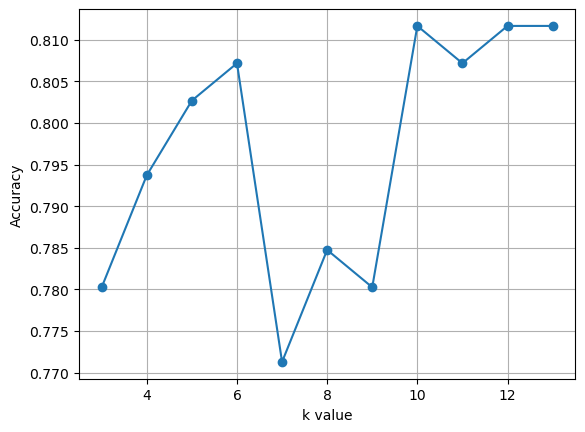

In [78]:
# plot k values versus accuracy
plt.plot(neighbors, metric_k, 'o-') # to mark using 'o-'
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

-from the above display, k value = 10,12, 13 having highest accuracy ( 0.8116591928251121) which indicates out of total 100, correctly classified as 81

In [79]:
knn = KNeighborsClassifier(n_neighbors=10) # using k value = 10, creating an instance
knn_model = knn.fit(X_train1, y_train1) # creating model with training data
y_pred_knn = knn_model.predict(X_test1) # finding the predicted values of test data using features of test data

E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [80]:
# display confusion matrix
print(confusion_matrix(y_test1, y_pred_knn))
# display accuracy score
print(accuracy_score(y_test1, y_pred_knn))
# display precision score
print(precision_score(y_test1, y_pred_knn))
# display recall score
print(recall_score(y_test1, y_pred_knn))

[[123  11]
 [ 31  58]]
0.8116591928251121
0.8405797101449275
0.651685393258427


### SVM MODEL

In [81]:
# importing library
from sklearn.svm import SVC # SVC - support vector classifier

##### 'linear' kernel

In [82]:
# creating an instance for SVM using linear kernel
svm_lin = SVC(kernel = 'linear') 

In [83]:
# creating model using training data
svm_linmod = svm_lin.fit(X_train1, y_train1) 

In [84]:
# predicting the data by giving 'X_test1'
y_pred_svmlin = svm_lin.predict(X_test1) 

In [85]:
# importing library for confusion matrix, accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

In [86]:
# display confusion matrix
confusion_matrix(y_test1, y_pred_svmlin)

array([[112,  22],
       [ 26,  63]], dtype=int64)

In [87]:
# display accuracy score
accuracy_score(y_test1, y_pred_svmlin)

0.7847533632286996

##### 'rbf' kernel

In [88]:
 # creating an instance for SVM  using rbf kernel
svm_rbf = SVC(kernel = 'rbf') 

In [89]:
# creating model using training data
svm_rbfmod = svm_rbf.fit(X_train1, y_train1) 

In [90]:
# predicting the data by giving 'X_test1'
y_pred_svmrbf = svm_rbf.predict(X_test1)

In [91]:
# display confusion matrix
confusion_matrix(y_test1, y_pred_svmrbf)

array([[123,  11],
       [ 32,  57]], dtype=int64)

In [92]:
# display accuracy score
accuracy_score(y_test1, y_pred_svmrbf)

0.8071748878923767

##### 'polynomial' kernel

In [93]:
# creating an instance for SVM  using 'polynomial' kernel
svm_poly = SVC(kernel='poly') # creating an instance using linear kernel

In [94]:
# creating model using training data
svm_polmod = svm_poly.fit(X_train1, y_train1) 

In [95]:
# predicting the data by giving 'X_test1'
y_pred_svmpol = svm_poly.predict(X_test1)

In [96]:
# display confusion matrix
confusion_matrix(y_test1, y_pred_svmpol)

array([[124,  10],
       [ 32,  57]], dtype=int64)

In [97]:
# display accuracy score
accuracy_score(y_test1, y_pred_svmpol)

0.8116591928251121

### DECISION TREE

In [98]:
# importing library
from sklearn.tree import DecisionTreeClassifier

In [99]:
# creating an instance for decision tree classifier
dec_tree = DecisionTreeClassifier(random_state=42) 

In [100]:
# creating model using training data 
dec_tree.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=42)

In [101]:
# predicting the data by giving 'X_test1'
y_pred_dectree = dec_tree.predict (X_test1)

In [102]:
# display confusion matrix
confusion_matrix(y_test1, y_pred_dectree)

array([[103,  31],
       [ 29,  60]], dtype=int64)

In [103]:
# display accuracy score
accuracy_score(y_test1, y_pred_dectree)

0.7309417040358744

### RANDOM FOREST

In [104]:
# importing library
from sklearn.ensemble import RandomForestClassifier

In [105]:
# creating an instance for random forest classifier
ran_for = RandomForestClassifier(random_state=42)

In [106]:
# creating model using training data 
ran_for.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [107]:
# predicting the data by giving 'X_test1'
y_pred_ranfor = ran_for.predict (X_test1)

In [108]:
# display confusion matrix
confusion_matrix(y_test1, y_pred_ranfor)

array([[107,  27],
       [ 22,  67]], dtype=int64)

In [109]:
# display accuracy score
accuracy_score(y_test1, y_pred_ranfor)

0.7802690582959642